In [4]:
import radd
from radd import build


from scipy.stats.mstats import mquantiles as mq
from scipy.stats.mstats_extras import mjci

homedir = os.path.expanduser('~')
cox = pd.read_csv(os.path.join(homedir, "Dropbox/Projects/Coxon/coxon_behav_data_binned.csv"))
#cox = pd.read_csv(os.path.join(homedir, "Dropbox/Projects/Coxon/coxon_behav_data.csv"))
pro = pd.read_csv(os.path.join(homedir, "Dropbox/Projects/SS/Proactive/pro_data.csv"))
re = pd.read_csv(os.path.join(homedir, "Dropbox/Projects/SS/Reactive/Re_Data.csv"), index_col=0)

ssb = pd.read_csv(os.path.join(homedir, "Dropbox/Projects/SSBayes/alldata_clean.csv"), index_col=0)

In [5]:
re_popt = {'a': 0.45, 'v': 1.26, 'xb': 1.3, 'ssv': -1.3, 'tr': 0.2}

In [6]:
re_small = re[re.idx.isin(re.idx.unique()[:5])]

In [9]:
m = build.Model(data=re_small, depends_on={'v': 'Cond'}, kind='xdpm', fit_on='subjects', inits=re_popt)

In [10]:
m.optimize(maxfev=5000, tol=1.e-4, btol=1.e-2, multiopt=True, nrand_inits=5, fit_flat=True, fit_cond=True, method='nelder', bdisp=True, disp=True)

using default inits: fmin=0.015631664
Finished Hopping Around
Optimization terminated successfully.
         Current function value: 0.000367
         Iterations: 33
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 0.002081
         Iterations: 36
         Function evaluations: 89
using default inits: fmin=0.040612137
Finished Hopping Around
Optimization terminated successfully.
         Current function value: 0.000243
         Iterations: 42
         Function evaluations: 104
using default inits: fmin=0.028069271
Finished Hopping Around
using default inits: fmin=0.009474747
Finished Hopping Around
Optimization terminated successfully.
         Current function value: 0.000113
         Iterations: 54
         Function evaluations: 127
Optimization terminated successfully.
         Current function value: 0.001573
         Iterations: 128
         Function evaluations: 338
using default inits: fmin=0.004985583
Finished Hopping Ar

In [230]:
m.finfo_flat_list[0]

a          0.53625
chi       0.039903
cnvrg         True
ndata           16
nfev            36
nvary            5
ssv       -0.98396
tr         0.17801
v             1.26
xb         0.87761
df              11
rchi     0.0036276
logp       -89.907
AIC        -79.907
BIC        -85.525
dtype: object

In [220]:
m.observed[0]

array([[ 0.99174,  1.     ,  1.     ,  0.95   ,  0.6    ,  0.     ,
         0.50509,  0.53191,  0.55812,  0.56643,  0.59818,  0.49608,
         0.53166,  0.53187,  0.54585,  0.56744],
       [ 0.97521,  1.     ,  1.     ,  0.95   ,  0.8    ,  0.1    ,
         0.51767,  0.54517,  0.57184,  0.59735,  0.61186,  0.51983,
         0.54525,  0.55858,  0.57181,  0.60212]])

In [219]:
m.yhat_list[0].reshape(2,16)

array([[ 0.951  ,  1.     ,  0.99956,  0.94212,  0.54772,  0.15283,
         0.52707,  0.55465,  0.57494,  0.59569,  0.62462,  0.51909,
         0.54436,  0.56208,  0.5811 ,  0.60953],
       [ 0.92619,  1.     ,  0.99968,  0.95527,  0.60611,  0.19156,
         0.53328,  0.56189,  0.58213,  0.60243,  0.63019,  0.5242 ,
         0.54917,  0.56881,  0.58812,  0.61371]])

In [117]:
m.simulator.y
m.simulator.wts

array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        0.9907 ,  1.12914,  1.42145,  1.03089,  1.07182,  0.12239,
        0.69461,  0.84625,  0.67763,  0.58567])

In [158]:
m.opt.optmod.nvarys

5

In [159]:
m.finfo_flat_list[0]['nvary'] = m.opt.optmod.nvarys

In [163]:
m.fitinfo.loc[0, :] = m.assess_fit(m.finfo_flat_list[0])

In [169]:
m.fitinfo

(6, 14)

In [160]:
m.assess_fit(m.finfo_flat_list[0])

a         0.53625
chi       0.03967
ndata    16.00000
nvary     5.00000
ssv      -0.98396
tr        0.17801
v         1.26000
xb        0.87761
df       11.00000
rchi      0.00361
logp    -89.99889
AIC     -79.99889
BIC     -85.61686
dtype: float64

In [142]:
np.sum(m.simulator.wts*(m.simulator.y-m.simulator.sim_fx(m.opt.optmod.params.valuesdict()))**2)

0.076356277249213858

In [130]:
m.simulator.sim_fx(m.opt.optmod.params.valuesdict())



array([ 0.954  ,  1.     ,  1.     ,  0.947  ,  0.509  ,  0.141  ,
        0.52501,  0.55401,  0.57301,  0.59401,  0.62301,  0.51601,
        0.54301,  0.56001,  0.58101,  0.60801])

In [98]:
fp = dict(deepcopy(m.fitparams))

def breakdown_vector(vector, fp):
    nssd = fp['nssd']+1
    nquant = len(fp['percentiles'])
    
    presp = vector[1:nssd]
    quant = vector[-nquant*2:]
    quant_cor = quant[:nquant]
    quant_err = quant[-nquant:]
    #quant_err = vector[nssd+nquant:]
    
    return presp, quant_cor, quant_err


phat, qchat, qehat = [], [], []
for vector in m.yhat_flat_list:
    presp, quant_cor, quant_err = breakdown_vector(vector, fp)
    phat.append(presp)
    qchat.append(quant_cor)
    qehat.append(quant_err)

p, qc, qe = [], [], []
for vector in m.observed_flat:
    presp, quant_cor, quant_err = breakdown_vector(vector, fp)
    p.append(presp)
    qc.append(quant_cor)
    qe.append(quant_err)


[ 200.  250.  300.  350.  400.]
[ 200.  250.  300.  350.  400.]
[ 200.  250.  300.  350.  400.]


[354.01740174017402,
 354.01740174017402,
 374.56345634563456,
 374.56345634563456]

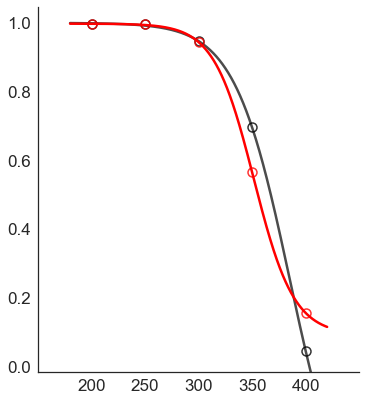

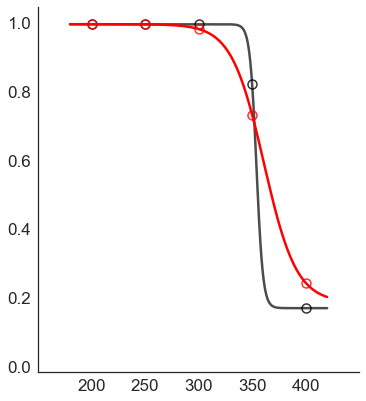

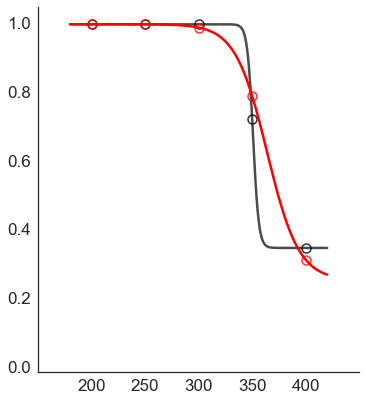

In [85]:
vis.scurves([p[0], phat[0]],  colors=['k', 'r'])
vis.scurves([p[1], phat[1]],  colors=['k', 'r'])
vis.scurves([p[2], phat[2]],  colors=['k', 'r'])

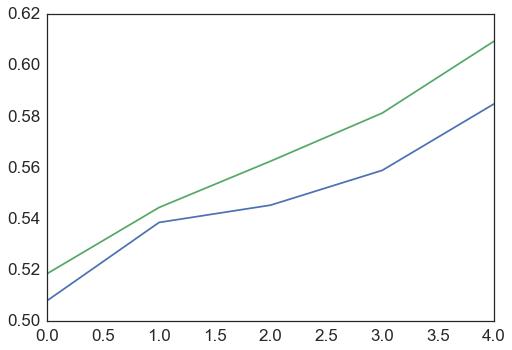

In [108]:
#for qevec, qehatvec  in zip(qe, qehat):
plt.plot(qe[0])
plt.plot(qehat[0])



In [12]:
m.observed_flat[0]

array([ 0.98347,  1.     ,  1.     ,  0.95   ,  0.7    ,  0.05   ,
        0.51138,  0.53854,  0.56498,  0.58189,  0.60502,  0.50795,
        0.53846,  0.54522,  0.55883,  0.58478])